In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Import dataset
data = pd.read_excel('data cuaca 2024.xlsx')
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data

,X1,X2,X3
Date,,,
2021-01-01,24.4,31.6,26.80
2021-01-02,24.0,32.5,26.60
2021-01-03,23.4,30.4,26.80
2021-01-04,24.0,31.8,27.50
2021-01-05,24.0,31.2,28.20
...,...,...,...
2024-04-26,24.2,32.8,27.35
2024-04-27,24.7,30.6,26.10
2024-04-28,24.8,30.5,27.40


In [ ]:
#Jumlah data yang mengalami missing
data.isna().sum()

X1    28
X2    13
X3     8
dtype: int64

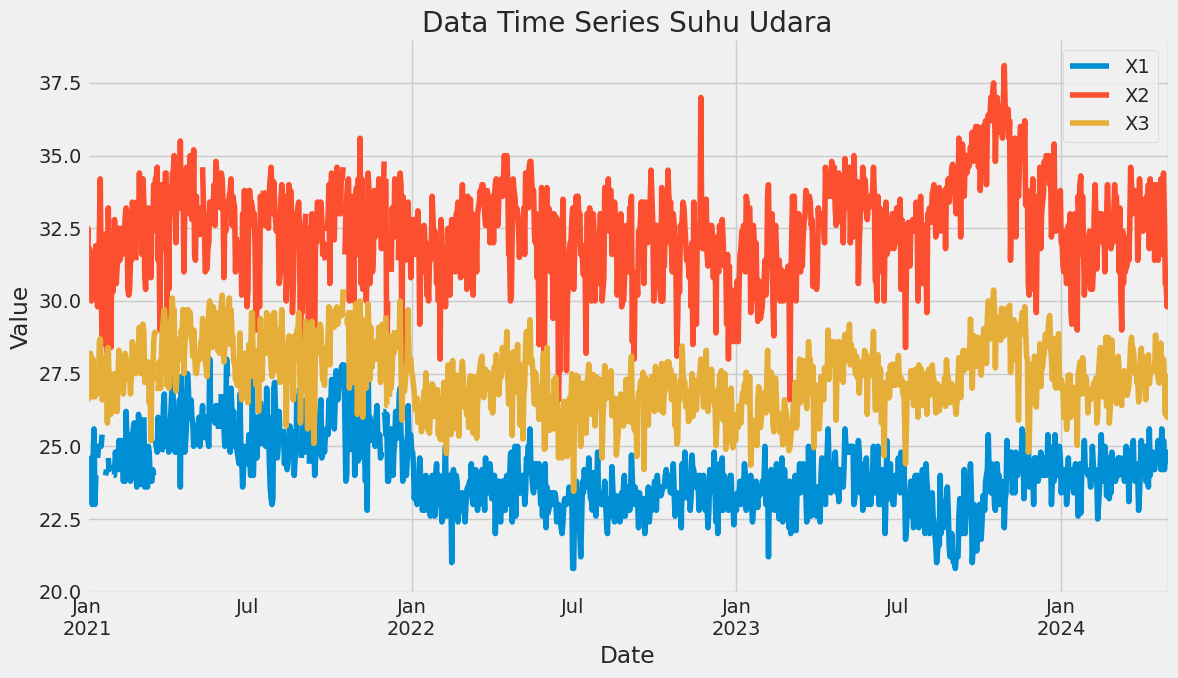

In [ ]:
plt.figure(figsize=(12, 7))
data[['X1', 'X2', 'X3']].plot(title='Data Time Series Suhu Udara', ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

In [ ]:
# Menghapus missing data untuk setiap kolom dengan cara mengganti data kosong dengan nilai meannya
data["X1"].fillna(data["X1"].mean(), inplace=True)
data["X2"].fillna(data["X2"].mean(), inplace=True)
data["X3"].fillna(data["X3"].mean(), inplace=True)

In [ ]:
#Jumlah data yang mengalami missing
data.isna().sum()

X1    0
X2    0
X3    0
dtype: int64

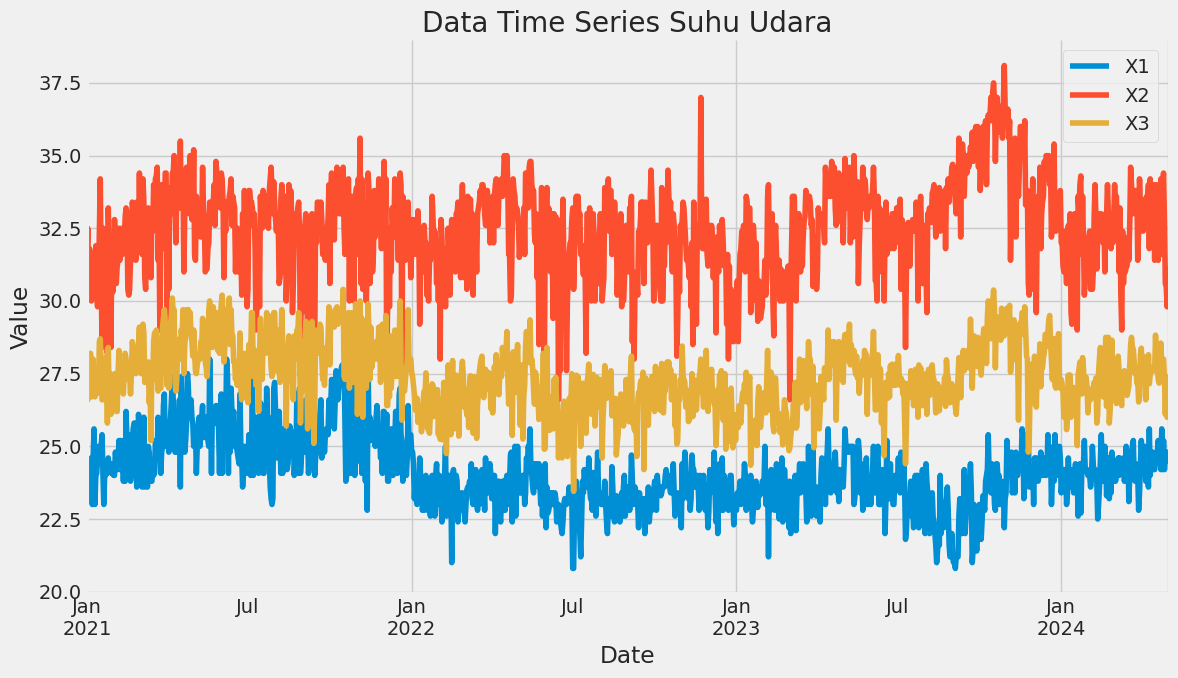

In [ ]:
plt.figure(figsize=(12, 7))
data[['X1', 'X2', 'X3']].plot(title='Data Time Series Suhu Udara', ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

In [ ]:
data.describe()

,X1,X2,X3
count,1216.00000,1216.000000,1216.000000
mean,24.07096,32.505486,27.403704
std,1.20003,1.636207,1.142948
min,20.80000,26.600000,23.450000
25%,23.30000,31.575000,26.650000
50%,24.00000,32.600000,27.400000
75%,24.80000,33.600000,28.100000
max,28.00000,38.100000,30.400000


In [ ]:
data.shape

(1216, 3)

In [ ]:
# Misalnya, data pelatihan akan menjadi 80% dari data Anda
training_size = int(len(data) * 0.9)
training_set = data.iloc[:training_size, 0:1].values
test_set = data.iloc[training_size:, 0:1].values


In [ ]:
test_set.shape

(122, 1)

In [ ]:
training_set.shape

(1094, 1)

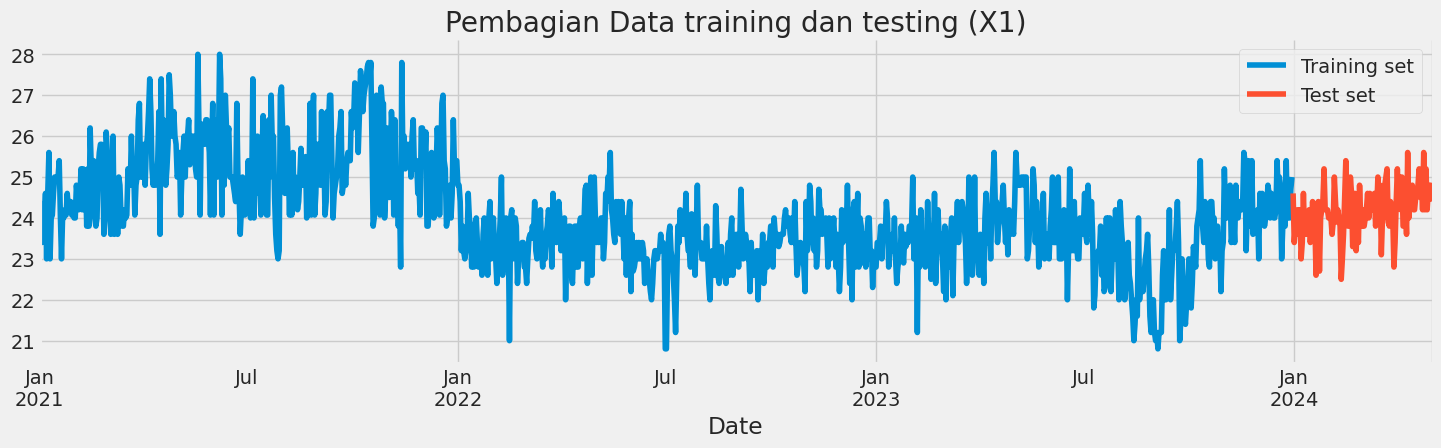

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
data["X1"][:1094].plot(figsize=(16,4),legend=True)
data["X1"][1094:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('Pembagian Data training dan testing (X1)')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled.shape

(1094, 1)

In [ ]:
STEPS=60

In [ ]:
#Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
for i in range(STEPS,training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-STEPS:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))


In [ ]:
X_train.shape

(1034, 60, 1)

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, activation='tanh', recurrent_activation='sigmoid', return_sequences=True, input_shape=(X_train.shape[1],1)))
#regressor.add(Dropout(0.2))
#Second LSTM layer
regressor.add(LSTM(units=100, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
#regressor.add(Dropout(0.2))
# # Third LSTM layer
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))
# #Fourth LSTM layer
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=4)

Epoch 1/50
259/259 [==============================] - 34s 102ms/step - loss: 0.0234
Epoch 2/50
259/259 [==============================] - 26s 102ms/step - loss: 0.0179
Epoch 3/50
259/259 [==============================] - 27s 102ms/step - loss: 0.0172
Epoch 4/50
259/259 [==============================] - 26s 102ms/step - loss: 0.0166
Epoch 5/50
259/259 [==============================] - 33s 126ms/step - loss: 0.0154
Epoch 6/50
259/259 [==============================] - 26s 102ms/step - loss: 0.0156
Epoch 7/50
259/259 [==============================] - 26s 102ms/step - loss: 0.0162
Epoch 8/50
259/259 [==============================] - 28s 107ms/step - loss: 0.0157
Epoch 9/50
259/259 [==============================] - 26s 102ms/step - loss: 0.0153
Epoch 10/50
259/259 [==============================] - 31s 121ms/step - loss: 0.0153
Epoch 11/50
259/259 [==============================] - 31s 118ms/step - loss: 0.0147
Epoch 12/50
259/259 [==============================] - 26s 101ms/step - lo

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((data["X1"][:1094],data["X1"][1094:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - STEPS:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(STEPS,test_set.shape[0]+STEPS):
    X_test.append(inputs[i-STEPS:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_X1 = regressor.predict(X_test)
predicted_X1 = sc.inverse_transform(predicted_X1)


4/4 [==============================] - 0s 56ms/step


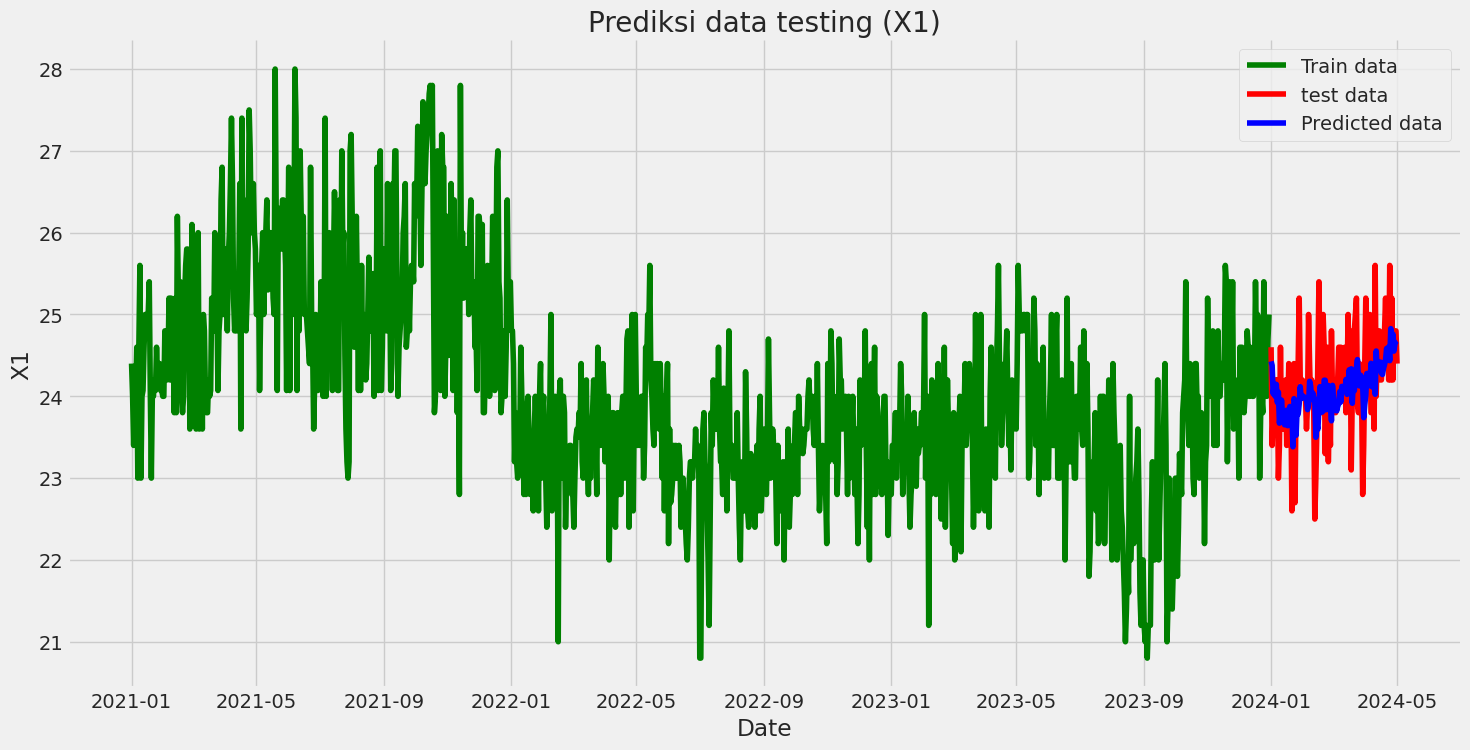

In [ ]:
def plot_predictions(test, predicted, start_date):
    fig, ax1 = plt.subplots(figsize=(16, 8))

##Assuming data has a date column and it's already converted to datetime
    dates = pd.date_range(start=start_date, periods=len(test), freq='D')

#Plotting the training data
    plt.plot(data["X1"][:1094], color='green', label='Train data')

#Plotting the actual test data with correct dates
    plt.plot(dates, test, color='red', label='test data')

#Plotting the predicted data with correct dates
    plt.plot(dates, predicted, color='blue', label='Predicted data')

    plt.title('Prediksi data testing (X1)')
    plt.xlabel('Date')
    plt.ylabel('X1')
    plt.legend()
    plt.show()

#Visualizing the results for LSTM
start_date = '2024-01-01'  # Assuming the test data starts from 2020
plot_predictions(test_set, predicted_X1, start_date)


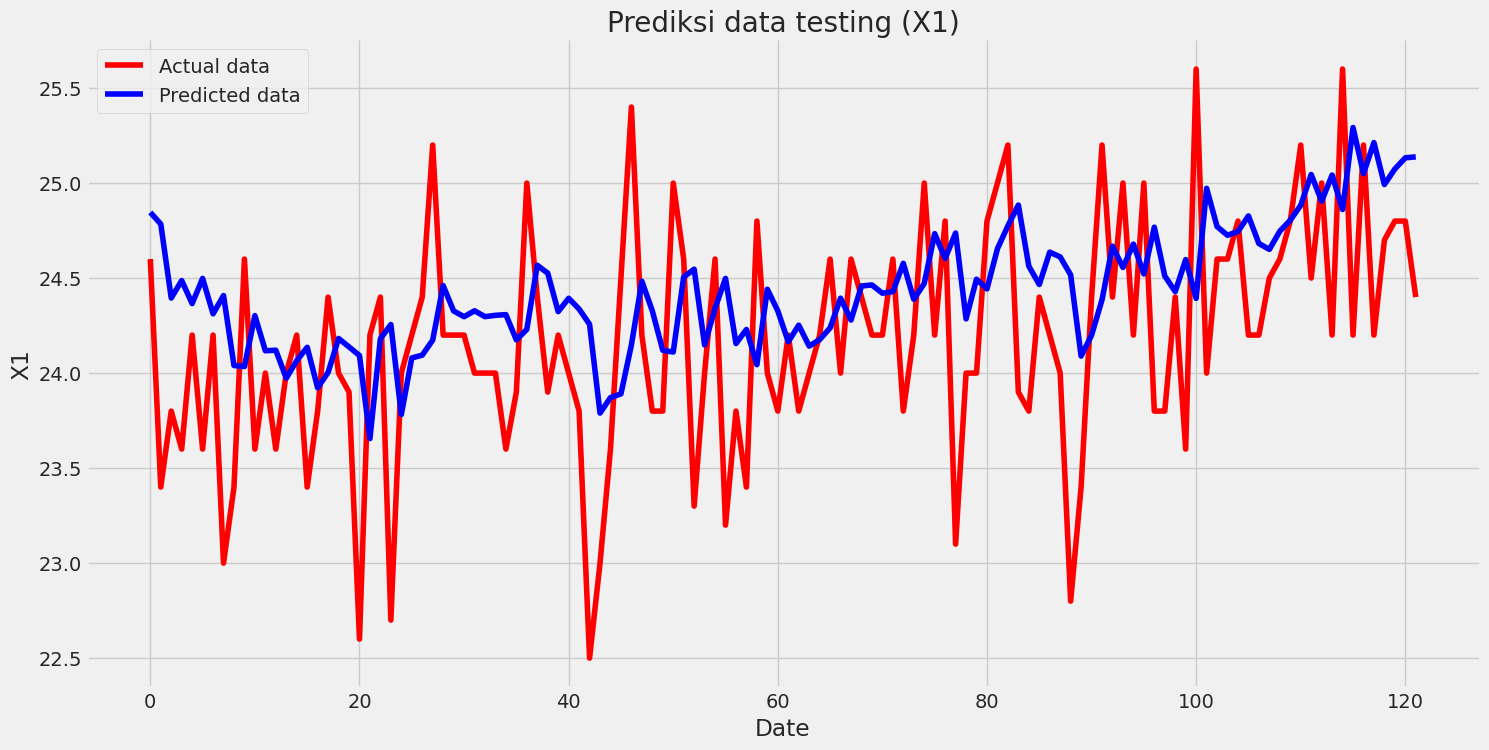

In [ ]:
def plot_predictions(test,predicted):
    fig, ax1 = plt.subplots(figsize=(16, 8))
    plt.plot(test, color='red',label='Actual data')
    plt.plot(predicted, color='blue',label='Predicted data')
    plt.title('Prediksi data testing (X1)')
    plt.xlabel('Date')
    plt.ylabel('X1')
    plt.legend()
    plt.show()

# Visualizing the results for LSTM
plot_predictions(test_set,predicted_X1)

In [ ]:

# Evaluating our model
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

return_rmse(test_set,predicted_X1)

The root mean squared error is 0.5944886157932717.


In [ ]:

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(test_set, predicted_X1) /test_set))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

Mean Absolute Percentage Error (MAPE): 1.9 %


In [ ]:
# Persiapan DataFrame untuk hasil prediksi
STEPS=60
prediction_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(days=1), periods=STEPS, freq='D')
predicted_df = pd.DataFrame(predicted_X1[-STEPS:], index=prediction_dates, columns=['Predicted X1'])


In [ ]:
predicted_df

,Predicted X1
2024-05-01,23.921387
2024-05-02,23.821747
2024-05-03,23.877348
2024-05-04,23.910221
2024-05-05,24.056738
2024-05-06,23.931381
2024-05-07,24.121199
2024-05-08,24.094421
2024-05-09,24.076466
2024-05-10,24.071835


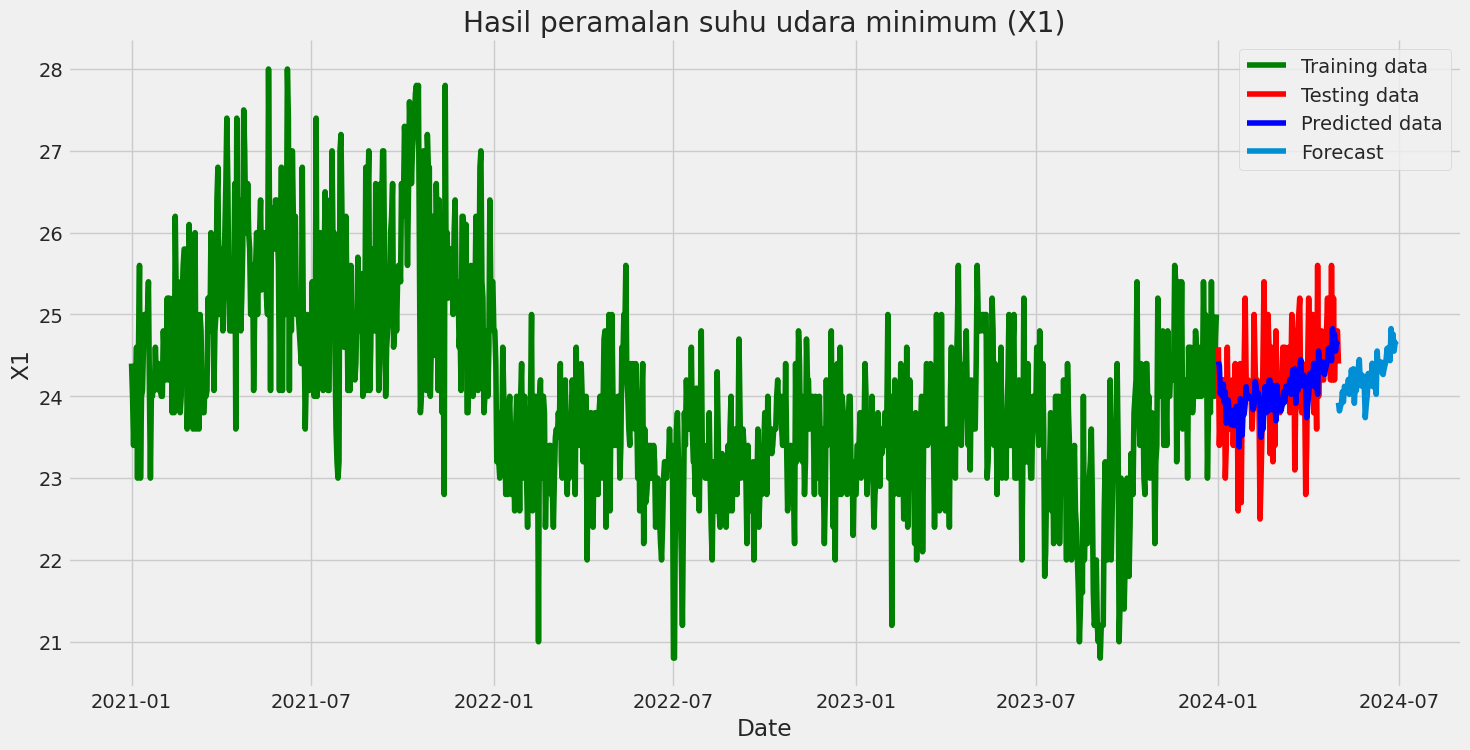

In [ ]:
def plot_predictions(test, predicted, start_date):
    fig, ax1 = plt.subplots(figsize=(16, 8))

##Assuming data has a date column and it's already converted to datetime
    dates = pd.date_range(start=start_date, periods=len(test), freq='D')

#Plotting the training data
    plt.plot(data["X1"][:1094], color='green', label='Training data')

#Plotting the actual test data with correct dates
    plt.plot(dates, test, color='red', label='Testing data')

#Plotting the predicted data with correct dates
    plt.plot(dates, predicted, color='blue', label='Predicted data')

# Plot hasil prediksi
    plt.plot(predicted_df.index, predicted_df['Predicted X1'], label='Forecast')

    plt.title('Hasil peramalan suhu udara minimum (X1)')
    plt.xlabel('Date')
    plt.ylabel('X1')
    plt.legend()
    plt.show()

#Visualizing the results for LSTM
start_date = '2024-01-01'  # Assuming the test data starts from 2020
plot_predictions(test_set, predicted_X1, start_date)
